# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

>https://www.drivendata.org/competitions/66/flu-shot-learning

任务类型：分类（probability）

模型评价：ROC-AUC

[基准模型](https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/)：0.8185；目前最好的：0.8658

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import streamlit as st 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
random_state = 42

## 数据准备

In [4]:
train_fea = pd.read_csv('../data/training_set_features.csv')
train_label = pd.read_csv('../data/training_set_labels.csv')
test_fea = pd.read_csv('../data/test_set_features.csv')
submission = pd.read_csv('../data/submission_format.csv')

In [5]:
print(train_fea.shape)
train_fea.head()

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
print(train_label.shape)
train_label.head()

(26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [7]:
print(test_fea.shape)
test_fea.head()

(26708, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [8]:
print(submission.shape)
submission.head()

(26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


**Feature**

For all binary variables: `0` = No; `1` = Yes.

- `h1n1_concern` \- **Level** of concern about the H1N1 flu.

  - `0` = Not at all concerned; `1` = Not very concerned; `2` = Somewhat concerned; `3` = Very concerned

- `h1n1_knowledge` \- **Level** of knowledge about H1N1 flu.

  - `0` = No knowledge; `1` = A little knowledge; `2` = A lot of knowledge.

- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)

- `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)

- `behavioral_face_mask` - Has bought a face mask. (binary)

- `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)

- `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)

- `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)

- `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)

- `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)

- `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)

- `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

- `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)

- `health_worker` - Is a healthcare worker. (binary)

- `health_insurance` - Has health insurance. (binary)

- `opinion_h1n1_vacc_effective`  \- Respondent's opinion about H1N1 vaccine effectiveness.

  - `1` = Not at all effective; `2` = Not very effective; `3` = Don't know; `4` = Somewhat effective; `5` = Very effective.

- `opinion_h1n1_risk` \- Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

  - `1` = Not at all effective; `2` = Not very effective; `3` = Don't know; `4` = Somewhat effective; `5` = Very effective.

- `opinion_h1n1_sick_from_vacc` \- Respondent's worry of getting sick from taking H1N1 vaccine.

  - `1` = Not at all worried; `2` = Not very worried; `3` = Don't know; `4` = Somewhat worried; `5` = Very worried.

- `opinion_seas_vacc_effective` \- Respondent's opinion about seasonal flu vaccine effectiveness.

  - `1` = Not at all effective; `2` = Not very effective; `3` = Don't know; `4` = Somewhat effective; `5` = Very effective.

- `opinion_seas_risk`

   \- Respondent's opinion about risk of getting sick with seasonal flu without vaccine.

  - `1` = Very Low; `2` = Somewhat low; `3` = Don't know; `4` = Somewhat high; `5` = Very high.

- `opinion_seas_sick_from_vacc`

   \- Respondent's worry of getting sick from taking seasonal flu vaccine.

  - `1` = Not at all worried; `2` = Not very worried; `3` = Don't know; `4` = Somewhat worried; `5` = Very worried.

- `age_group` - Age group of respondent.

- `education` - Self-reported education level.

- `race` - Race of respondent.

- `sex` - Sex of respondent.

- `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.

- `marital_status` - Marital status of respondent.

- `rent_or_own` - Housing situation of respondent.

- `employment_status` - Employment status of respondent.

- `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

- `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

- `household_adults` - Number of *other* adults in household, top-coded to 3.

- `household_children` - Number of children in household, top-coded to 3.

- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.

- `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

**分别合并训练集、测试集**

In [9]:
train_data = pd.merge(train_fea,train_label,on='respondent_id',how='inner')
test_data = pd.merge(test_fea,submission,on='respondent_id',how='inner')

In [10]:
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [11]:
test_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,0.5,0.7
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,0.5,0.7
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,0.5,0.7
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0.5,0.7
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,0.5,0.7


合并训练集测试集一起处理

In [12]:
train_data['data'] = 'train'
test_data['data'] = 'test'

flu_data = pd.concat([train_data,test_data])
flu_data.set_index('respondent_id',inplace=True)

In [13]:
print(flu_data.shape)
flu_data.head()

(53415, 38)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,data
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0.0,0.0,train
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0.0,1.0,train
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0.0,0.0,train
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0.0,1.0,train
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0,0.0,train


## 数据探索

1. 缺失

<AxesSubplot:>

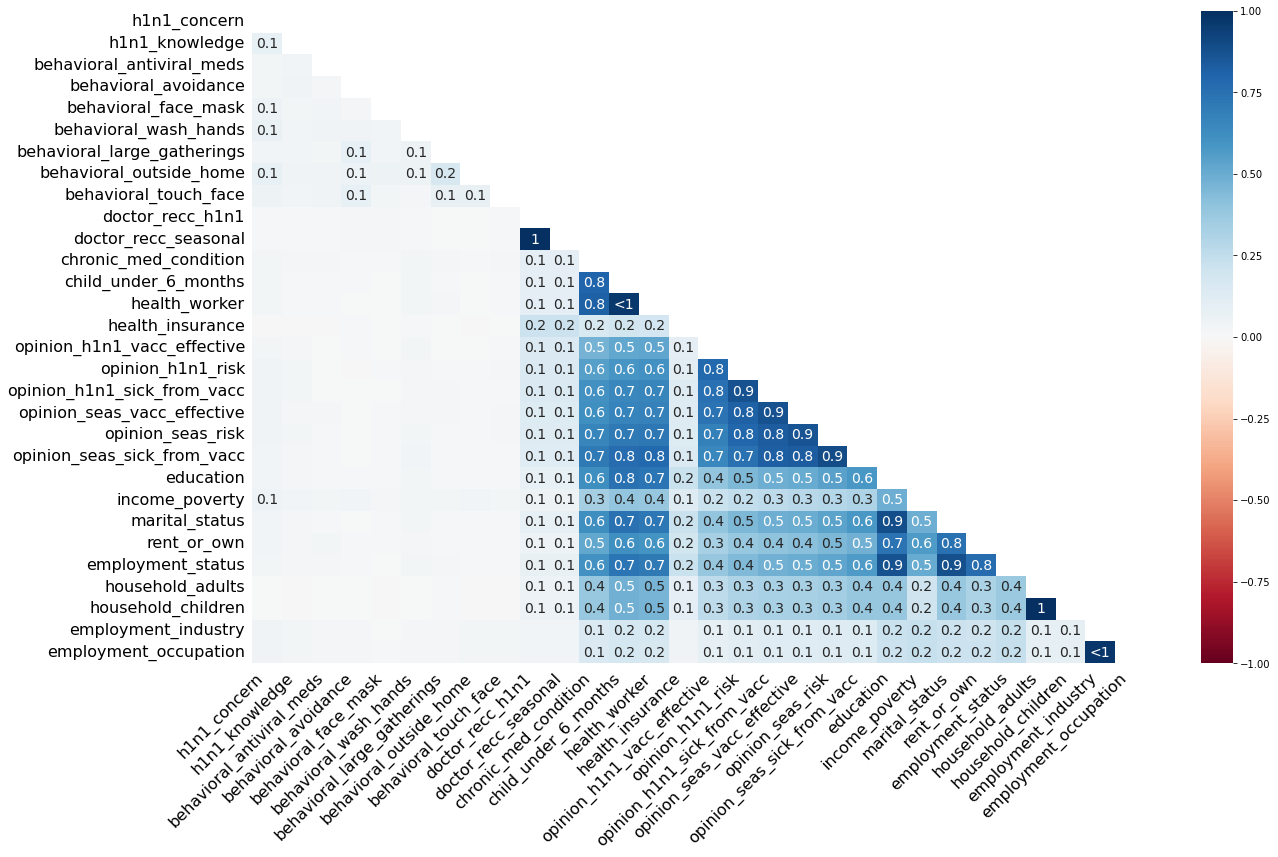

In [14]:
msno.heatmap(flu_data)

<AxesSubplot:>

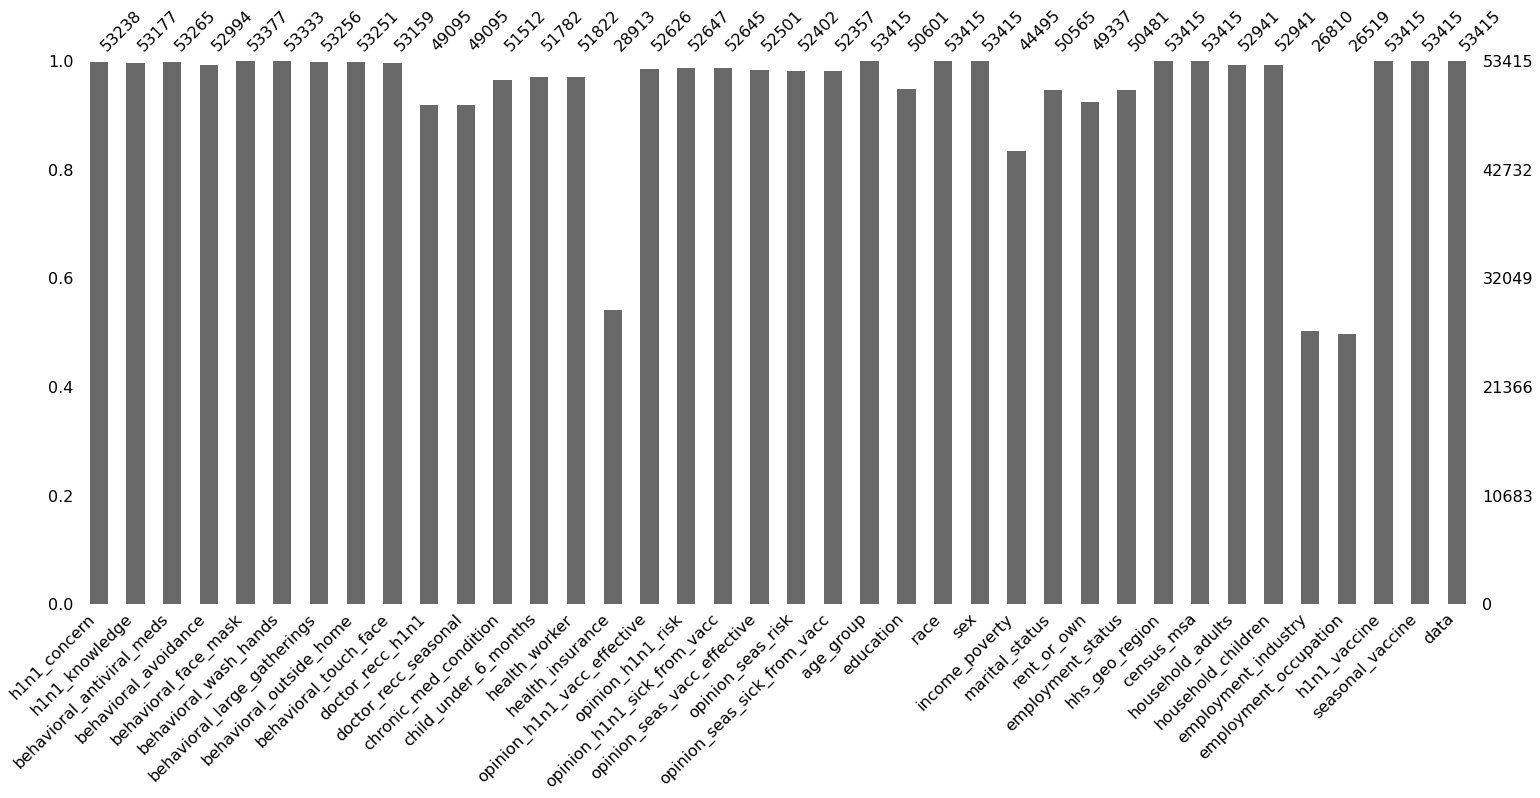

In [15]:
msno.bar(flu_data)

<AxesSubplot:>

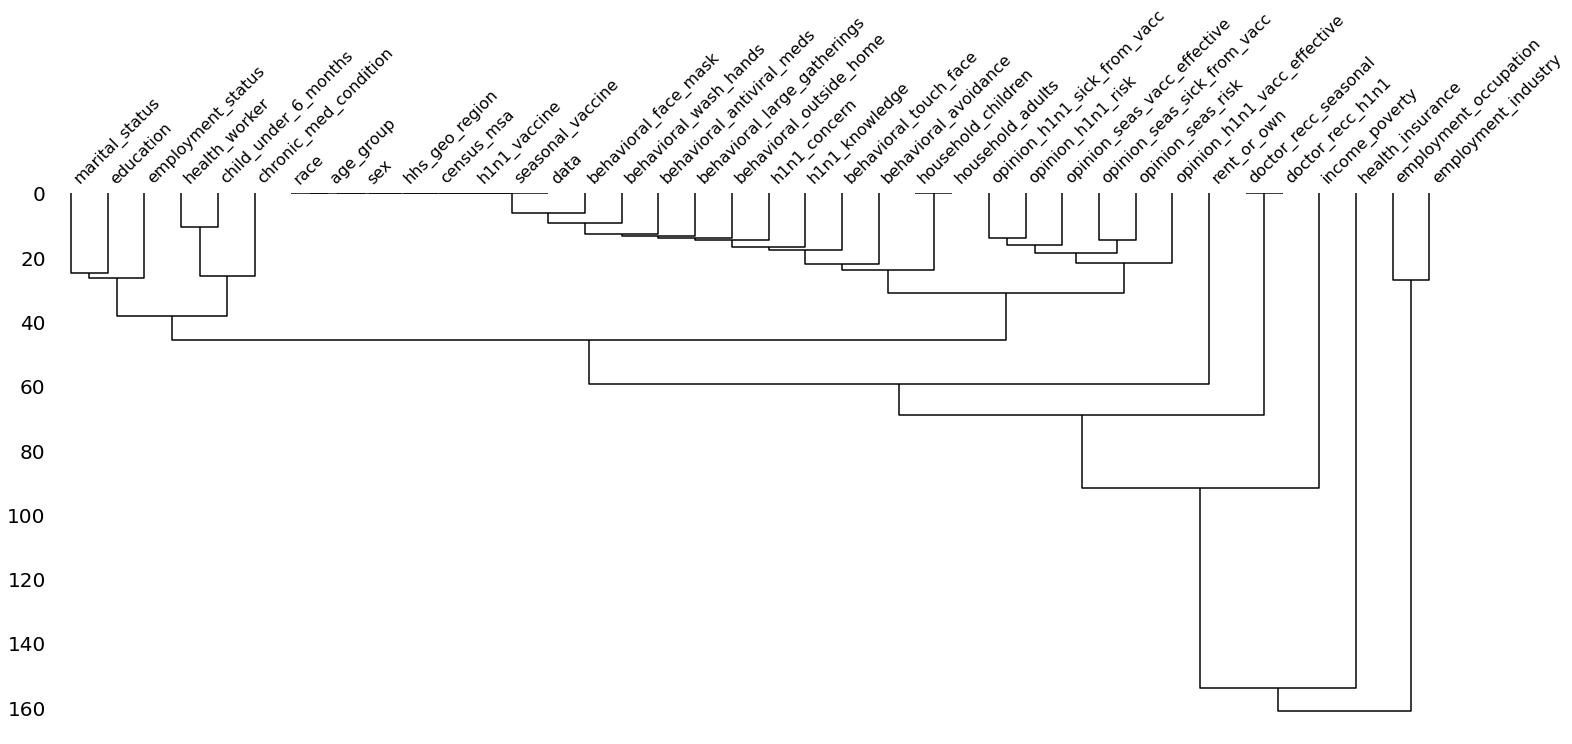

In [16]:
msno.dendrogram(flu_data)

<AxesSubplot:>

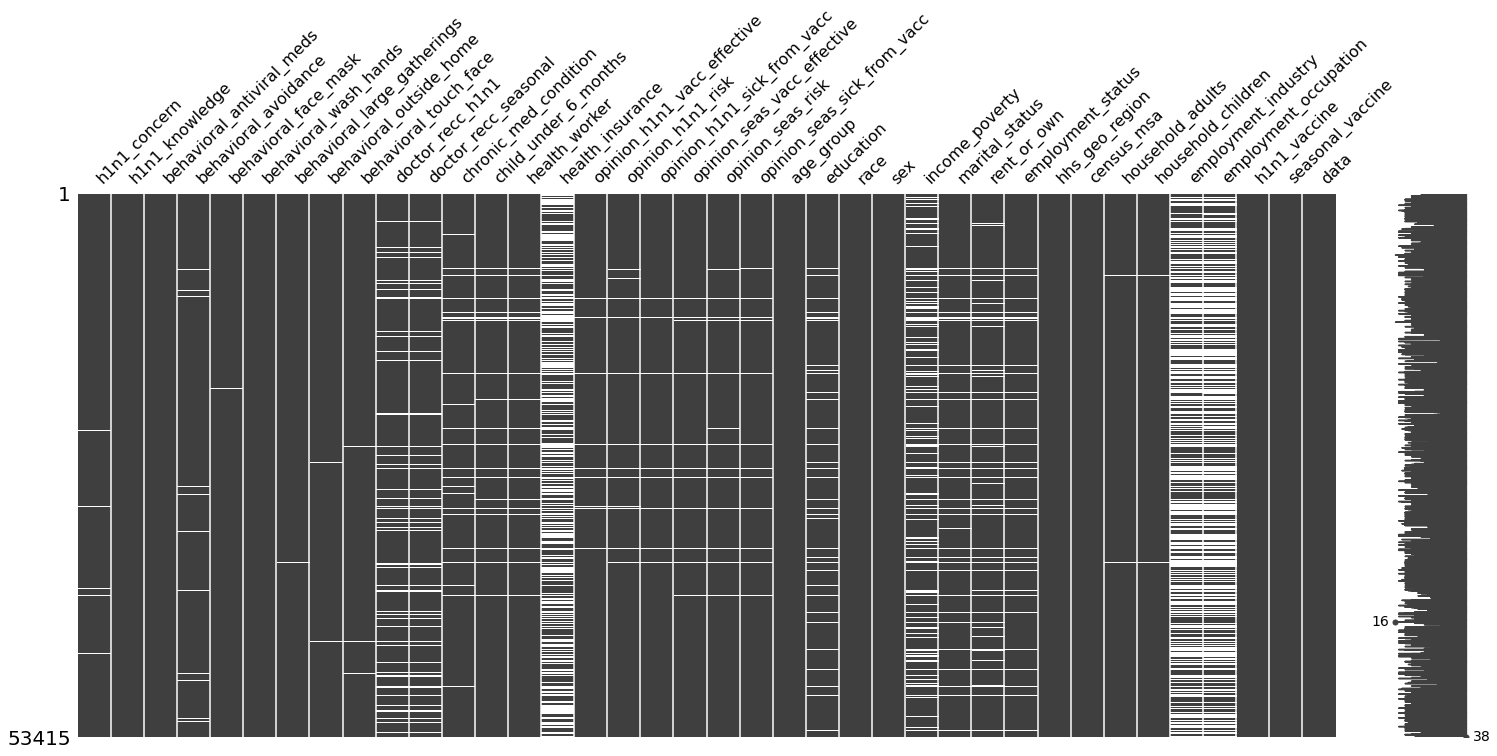

In [17]:
msno.matrix(flu_data)

2. 类型

In [18]:
flu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53238 non-null  float64
 1   h1n1_knowledge               53177 non-null  float64
 2   behavioral_antiviral_meds    53265 non-null  float64
 3   behavioral_avoidance         52994 non-null  float64
 4   behavioral_face_mask         53377 non-null  float64
 5   behavioral_wash_hands        53333 non-null  float64
 6   behavioral_large_gatherings  53256 non-null  float64
 7   behavioral_outside_home      53251 non-null  float64
 8   behavioral_touch_face        53159 non-null  float64
 9   doctor_recc_h1n1             49095 non-null  float64
 10  doctor_recc_seasonal         49095 non-null  float64
 11  chronic_med_condition        51512 non-null  float64
 12  child_under_6_months         51782 non-null  float64
 13  health_worker   

In [19]:
flu_data.loc[flu_data['data']=='train'].describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [20]:
flu_data.loc[flu_data['data']=='test'].describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,24548.000000,24548.000000,25776.000000,25895.000000,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000,26708.0,26708.0
mean,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,0.222666,0.333551,0.281037,0.086310,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745,0.5,0.7
std,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,0.416044,0.471491,0.449514,0.280827,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.5,0.7
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.5,0.7
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.5,0.7
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.5,0.7
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,0.5,0.7


查看`object`

In [21]:
flu_data.select_dtypes('object').head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,data
respondent_id,,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN,train
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,train
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo,train
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN,train
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb,train


In [22]:
for col in flu_data.select_dtypes('object').columns:
    print(flu_data[col].value_counts())

65+ Years        13561
55 - 64 Years    11092
45 - 54 Years    10495
18 - 34 Years    10449
35 - 44 Years     7818
Name: age_group, dtype: int64
College Graduate    20283
Some College        14123
12 Years            11496
< 12 Years           4699
Name: education, dtype: int64
White                42523
Black                 4292
Hispanic              3458
Other or Multiple     3142
Name: race, dtype: int64
Female    31692
Male      21723
Name: sex, dtype: int64
<= $75,000, Above Poverty    25552
> $75,000                    13673
Below Poverty                 5270
Name: income_poverty, dtype: int64
Married        27103
Not Married    23462
Name: marital_status, dtype: int64
Own     37457
Rent    11880
Name: rent_or_own, dtype: int64
Employed              27192
Not in Labor Force    20323
Unemployed             2966
Name: employment_status, dtype: int64
lzgpxyit    8660
fpwskwrf    6506
qufhixun    6166
oxchjgsf    5846
bhuqouqj    5713
kbazzjca    5702
mlyzmhmf    4426
lrircsnp    41

+ age_group: 年龄段，5组，无序分类
+ education：教育水平，4组，无序分类
+ race：人种，4组，无序分类
+ sex：性别，2组，无序分类
+ income_poverty：收入水平，2组，无序分类
+ marital_status：婚姻状态，2组，无序分类
+ rent_or_own：2组，无序分类
+ employment_status：工作状态，3组，无序分类
+ hhs_geo_region：地理信息，10组，无需分类
+ census_msa：大都市统计区，3组，无序分类
+ employment_industry：行业类型，21组，无序分类
+ employment_occupation：职业类型，23组，无序分类

3. 均衡

In [23]:
flu_data.loc[flu_data['data']=='train']['h1n1_vaccine'].value_counts()

0.0    21033
1.0     5674
Name: h1n1_vaccine, dtype: int64

In [24]:
flu_data.loc[flu_data['data']=='train']['seasonal_vaccine'].value_counts()

0.0    14272
1.0    12435
Name: seasonal_vaccine, dtype: int64

标签比例

H1N1:5674/26708

seasonal_flu:12435/26708

4. 相关

2022-01-05 15:07:25.432 
  command:

    streamlit run /home/phagelab/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


<AxesSubplot:>

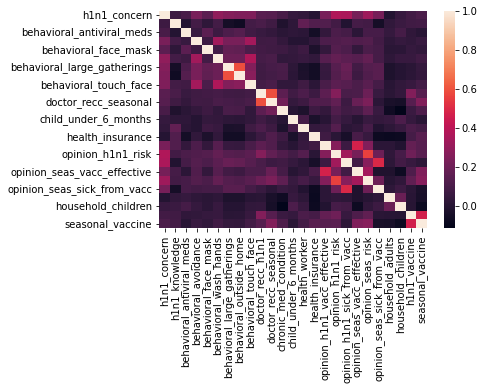

In [25]:
st.write("Pearson corr")
sns.heatmap(flu_data.select_dtypes(exclude=['object']).corr(method = 'pearson'))

<AxesSubplot:>

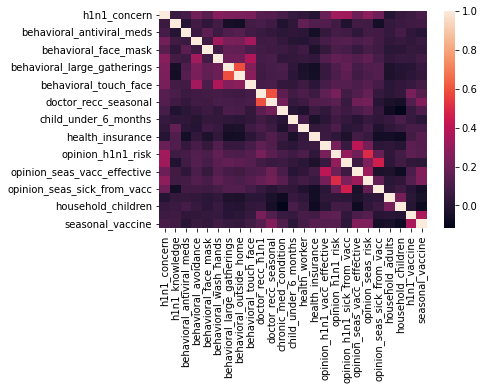

In [26]:
st.write("Kendall corr")
sns.heatmap(flu_data.select_dtypes(exclude=['object']).corr(method = 'kendall'))

<AxesSubplot:>

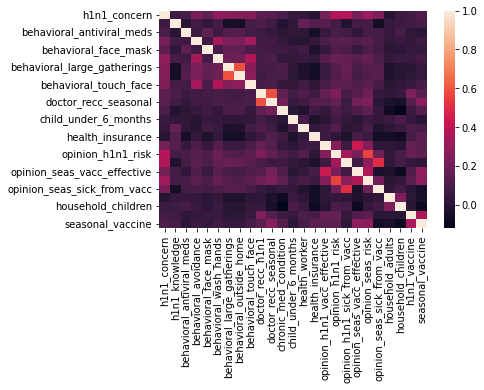

In [27]:
st.write("Spearman corr")
sns.heatmap(flu_data.select_dtypes(exclude=['object']).corr(method = 'spearman'))

## 数据处理

1. 缺失数据

In [76]:
flu_data.fillna(0,inplace=True)

2. 分类数据编码

3. 数据转化

## 特征探索

## 特征筛选

## 模型构建

In [30]:
# 线性
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
# 近邻
from sklearn.neighbors import KNeighborsClassifier
# Ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machines
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier

# 
from sklearn.model_selection import train_test_split

# 评价
from sklearn.metrics import roc_auc_score # average='macro'

### 分别对两种疫苗进行预测

划分训练集测试集

In [46]:
flu_data.columns[:-1]

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [77]:
fea= ['h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']



train_data1 = flu_data.loc[flu_data['data']=='train'][fea+['h1n1_vaccine']].select_dtypes(exclude='object')
train_data2 = flu_data.loc[flu_data['data']=='train'][fea+['seasonal_vaccine']].select_dtypes(exclude='object')

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [83]:
X1 = train_data1[train_data1.columns[:-1]].values
y1 = train_data1['h1n1_vaccine'].values
X2 = train_data2[train_data2.columns[:-1]].values
y2 = train_data2['seasonal_vaccine'].values


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.3, random_state=random_state, shuffle=True, stratify=y1)# , stratify='h1n1_vaccine'
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3, random_state=random_state, shuffle=True, stratify=y2)# , stratify='seasonal_vaccine'

In [92]:
y_test2

array([0., 1., 0., ..., 0., 1., 1.])

In [101]:
lgr = LogisticRegression(random_state=random_state) # clf.predict_proba
sgd = SGDClassifier(loss='log',random_state=random_state) # clf.predict_proba ,available for log loss and modified Huber loss
knn = KNeighborsClassifier() # clf.predict_proba
adc = AdaBoostClassifier(random_state=random_state) # clf.predict_proba
etc = ExtraTreesClassifier(random_state=random_state) # clf.predict_proba
gbc = GradientBoostingClassifier(random_state=random_state) # clf.predict_proba
rfc = RandomForestClassifier(random_state=random_state) # clf.predict_proba
# LinearSVC
svc = SVC(random_state=random_state,probability=True)# clf.predict_proba
dtc = DecisionTreeClassifier(random_state=random_state) # clf.predict_proba


models = [lgr,sgd,knn,adc,etc,gbc,rfc,svc,dtc]
clfs1= []

for clf in models:
    clf.fit(X_train1,y_train1)
    y_pre1 = clf.predict_proba(X_test1)# 分别对应 对于0、1的预测概率
    clfs1.append(clf)
    print(roc_auc_score(y_test1,y_pre1[:,1]))

0.8385108462440658
0.8334186425097394
0.7667565035290815
0.8526905719798736
0.8250182798728126
0.8570137828472137
0.8340363039111945
0.8364383825380154
0.6686515868344698


adc,gbc

In [97]:
clfs2= []

for clf in models:
    clf.fit(X_train2,y_train2)
    y_pre1 = clf.predict_proba(X_test2)# 分别对应 对于0、1的预测概率
    clfs2.append(clf)
    print(roc_auc_score(y_test2,y_pre1[:,1]))

0.8252045769247669
0.8225242677487469
0.7732931079355705
0.8345476022934698
0.807880557145774
0.8393958629060758
0.8205809950862981
0.8347321587402016
0.6631248958603398


In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

## 参数优化

## 预测